In [1]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline
from pyNA.pyna import pyna
import scipy

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
# Inputs 
z_cb_lst = np.hstack((np.linspace(25, 250, 10), np.linspace(300, 750, 10)))

TS_cb_lst = dict()
TS_cb_lst['stca']= dict()
TS_cb_lst['stca']['V2'] = np.linspace(0.75, 1.0, 11)
TS_cb_lst['stca']['Vmax'] = np.linspace(0.4, 1.0, 25)
TS_cb_lst['a10'] = dict()
TS_cb_lst['a10']['V2'] = np.linspace(0.775, 1.0, 10)
TS_cb_lst['a10']['Vmax'] = np.linspace(0.675, 1.0, 14)

Vmax_lst = dict()
Vmax_lst['stca'] = dict()
Vmax_lst['stca']['V2'] = 197*0.51444444
Vmax_lst['stca']['Vmax'] = 250*0.51444444
Vmax_lst['a10'] = dict()
Vmax_lst['a10']['V2'] = 234.4*0.51444444
Vmax_lst['a10']['Vmax'] = 250*0.51444444

py = pyna()

### Compute trajectories

In [6]:
# Compute trajectories for (z-TS) sweep 
if False:
    for ac_name in ['stca']:
        for case in ['V2']:
            for kind in ['std']:

                for flapsetting in ['cnst', 'phld']:

                    # Settings
                    if ac_name == 'stca' and case == 'V2' and kind == 'std':
                        TS = 0.75
                        z_cb = 700.0
                        k_rot = 1.1
                    elif ac_name == 'stca' and case == 'V2' and kind == 'adv':
                        TS = 0.75
                        z_cb = 25.0
                        k_rot = 1.1
                    elif ac_name == 'stca' and case == 'Vmax' and kind == 'std':
                        TS = 0.4
                        z_cb = 600.0
                        k_rot = 1.35
                    elif ac_name == 'stca' and case == 'Vmax' and kind == 'adv':
                        TS = 0.55
                        z_cb = 25.0
                        k_rot = 1.35

                    py.case_name = ac_name
                    py.ac_name = ac_name
                    py.engine_deck_name = 'engine_deck_' + ac_name + '.csv'
                    py.save_results = True
                    py.output_directory_name = 'PHLDa/' + case
                    py.tolerance = 1e-5
                    py.max_iter = 300
                    py.TS_to = 1.0
                    py.TS_vnrs = 1.0
                    py.pkrot = False
                    py.k_rot = k_rot

                    py.theta_slats = -6.

                    theta_lst = np.linspace(0, 26, 14)

                    for theta in theta_lst:
                        print("TS: ", TS)
                        print("z_cb:", z_cb)
                        print("theta", theta)

                        py.TS_cb = TS
                        py.z_cb = z_cb
                        py.theta_flaps = theta

                        if flapsetting == 'cnst':
                            py.theta_flaps_cb = theta
                            py.output_file_name = py.ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '_constant_th.sql'
                            path_save_name = 'trajectory_' + py.ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '_constant_th.csv'
                            engine_save_name = 'engine_' + py.ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '_constant_th.csv'
                        elif flapsetting == 'phld':
                            py.theta_flaps_cb = 0.
                            py.output_file_name = py.ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '.sql'
                            path_save_name = 'trajectory_' + py.ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '.csv'
                            engine_save_name = 'engine_' + py.ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '.csv'

                        # Compute trajectory
                        py.v_max = Vmax_lst[ac_name][case]
                        converged = py.compute_trajectory(trajectory_mode='cutback', objective='z_end')
                        py.save_time_series(py.path, py.airframe, path_save_name, engine_save_name)
                        clear_output()

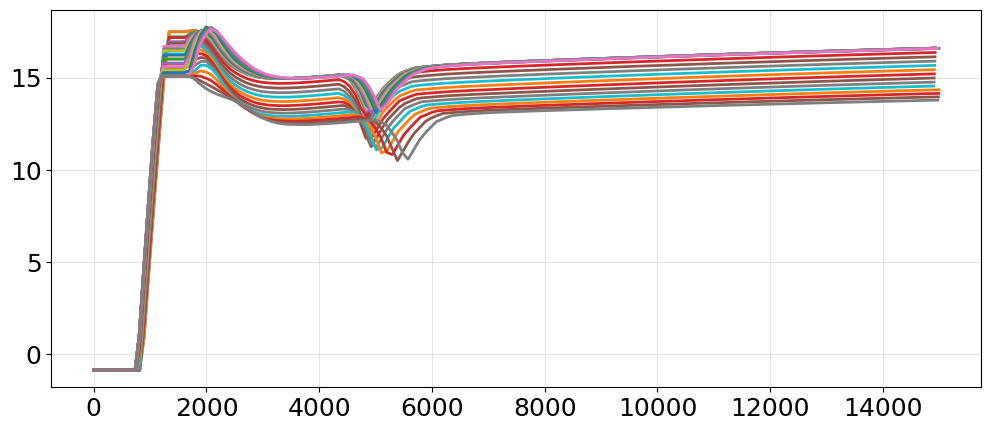

In [7]:
ac_name = 'stca'
case = 'V2'
for kind in ['std']:

    if ac_name == 'stca' and case == 'V2' and kind == 'std':
        TS = 0.75
        z_cb = 700.0
    elif ac_name == 'stca' and case == 'V2' and kind == 'adv':
        TS = 0.75
        z_cb = 25.0
    elif ac_name == 'stca' and case == 'Vmax' and kind == 'std':
        TS = 0.4
        z_cb = 600.0
    elif ac_name == 'stca' and case == 'Vmax' and kind == 'adv':
        TS = 0.55
        z_cb = 25.0

    theta_lst = np.linspace(0, 26, 14)

    d_min = np.zeros(14)
    d_min2 = np.zeros(14)
    d_min_ct = np.zeros(14)
    d_min_ct2 = np.zeros(14)

    for i,theta in enumerate(theta_lst):

        path_save_name = 'trajectory_' + py.ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '.csv'
        traj = pd.read_csv('../cases/' + ac_name + '/trajectory/PHLDa/' + case + '/'  + path_save_name)
        plt.plot(traj['X [m]'], traj['alpha [deg]'], '-')
        
        path_save_name = 'trajectory_' + ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '_constant_th.csv'
        traj_c = pd.read_csv('../cases/' + ac_name + '/trajectory/PHLDa/' + case + '/'  + path_save_name)
        plt.plot(traj_c['X [m]'], traj_c['alpha [deg]'], '-')
            
# plt.xlim([1300, 1900])
# plt.ylim([0, 500*0.3048])

### Plot trajectories

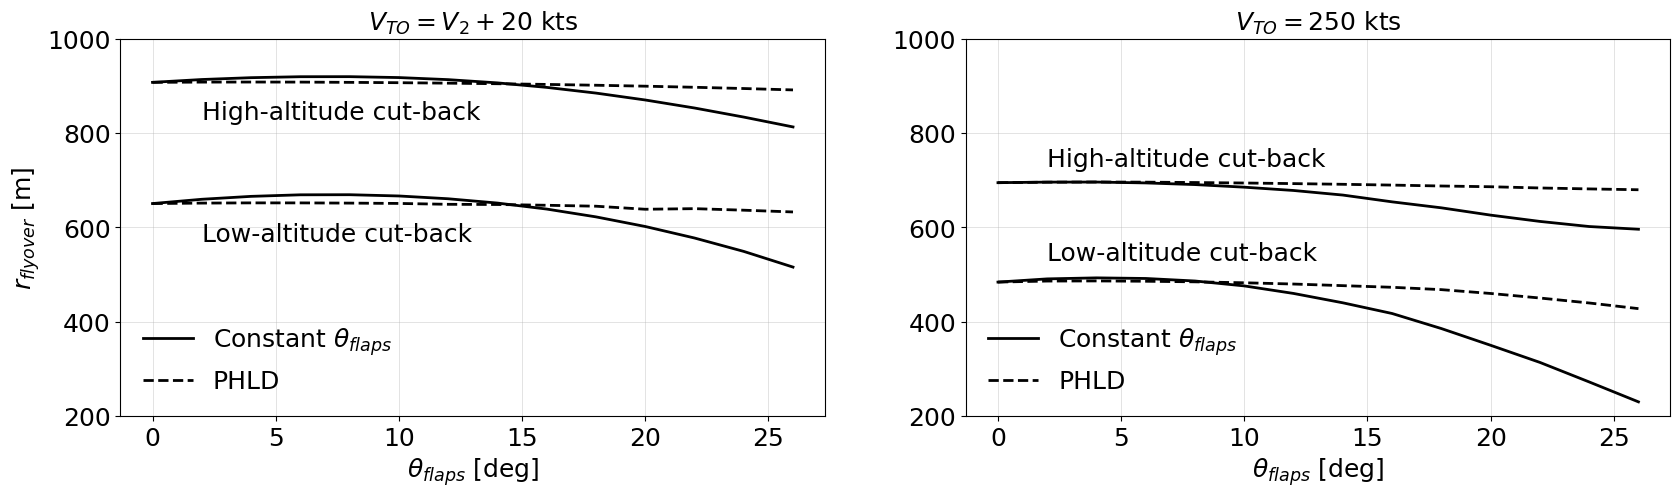

In [37]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
plt.style.use('../utils/plot.mplstyle')

ac_name = 'stca'
for j, case in enumerate(['V2', 'Vmax']):
    for kind in ['std', 'adv']:

        if ac_name == 'stca' and case == 'V2' and kind == 'std':
            TS = 0.75
            z_cb = 700.0
        elif ac_name == 'stca' and case == 'V2' and kind == 'adv':
            TS = 0.75
            z_cb = 25.0
        elif ac_name == 'stca' and case == 'Vmax' and kind == 'std':
            TS = 0.4
            z_cb = 600.0
        elif ac_name == 'stca' and case == 'Vmax' and kind == 'adv':
            TS = 0.55
            z_cb = 25.0

        theta_lst = np.linspace(0, 26, 14)

        d_min = np.nan*np.zeros(14)
        x_to = np.nan*np.zeros(14)
        d_min_ct = np.nan*np.zeros(14)
        x_to_ct = np.nan*np.zeros(14)

        for i,theta in enumerate(theta_lst):

            path_save_name = 'trajectory_' + py.ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '.csv'
            traj = pd.read_csv('../cases/' + ac_name + '/trajectory/PHLD/' + case + '/'  + path_save_name)

            d = np.sqrt((traj['X [m]'].values-6500)**2 + (traj['Z [m]'].values-4*0.3048)**2)
            d_min[i] = np.min(d)            
            
            path_save_name = 'trajectory_' + ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '_constant_th.csv'
            traj = pd.read_csv('../cases/' + ac_name + '/trajectory/PHLD/' + case + '/' + path_save_name)
            d_ct = np.sqrt((traj['X [m]'].values-6500)**2 + (traj['Z [m]'].values-4*0.3048)**2)
            d_min_ct[i] = np.min(d_ct)

        if kind == 'std':
            ax[j].plot(theta_lst, d_min_ct, 'k-', label=r'Constant $\theta_{flaps}$')
            ax[j].plot(theta_lst, d_min, 'k--', label=r'PHLD')
        else:
            ax[j].plot(theta_lst, d_min_ct, 'k-')
            ax[j].plot(theta_lst, d_min, 'k--')
            
ax[0].set_ylim([200, 1000])
ax[1].set_ylim([200, 1000])

ax[0].set_xlabel(r'$\theta_{flaps}$ [deg]')
ax[1].set_xlabel(r'$\theta_{flaps}$ [deg]')

ax[0].set_ylabel('$r_{flyover}$ [m]')

ax[0].set_title('$V_{TO} = V_2+20$ kts')
ax[1].set_title('$V_{TO} = 250$ kts')

ax[0].annotate(s='High-altitude cut-back', xy=(2, 830), fontsize=18)
ax[0].annotate(s='Low-altitude cut-back', xy=(2, 570), fontsize=18)

ax[1].annotate(s='High-altitude cut-back', xy=(2, 730), fontsize=18)
ax[1].annotate(s='Low-altitude cut-back', xy=(2, 530), fontsize=18)

# ax[0].annotate(s='High-altitude cut-back', xy=())
# ax[1].annotate(s='Low-altitude cut-back', xy=())


ax[0].legend(frameon=False)
ax[1].legend(frameon=False, loc='lower left')

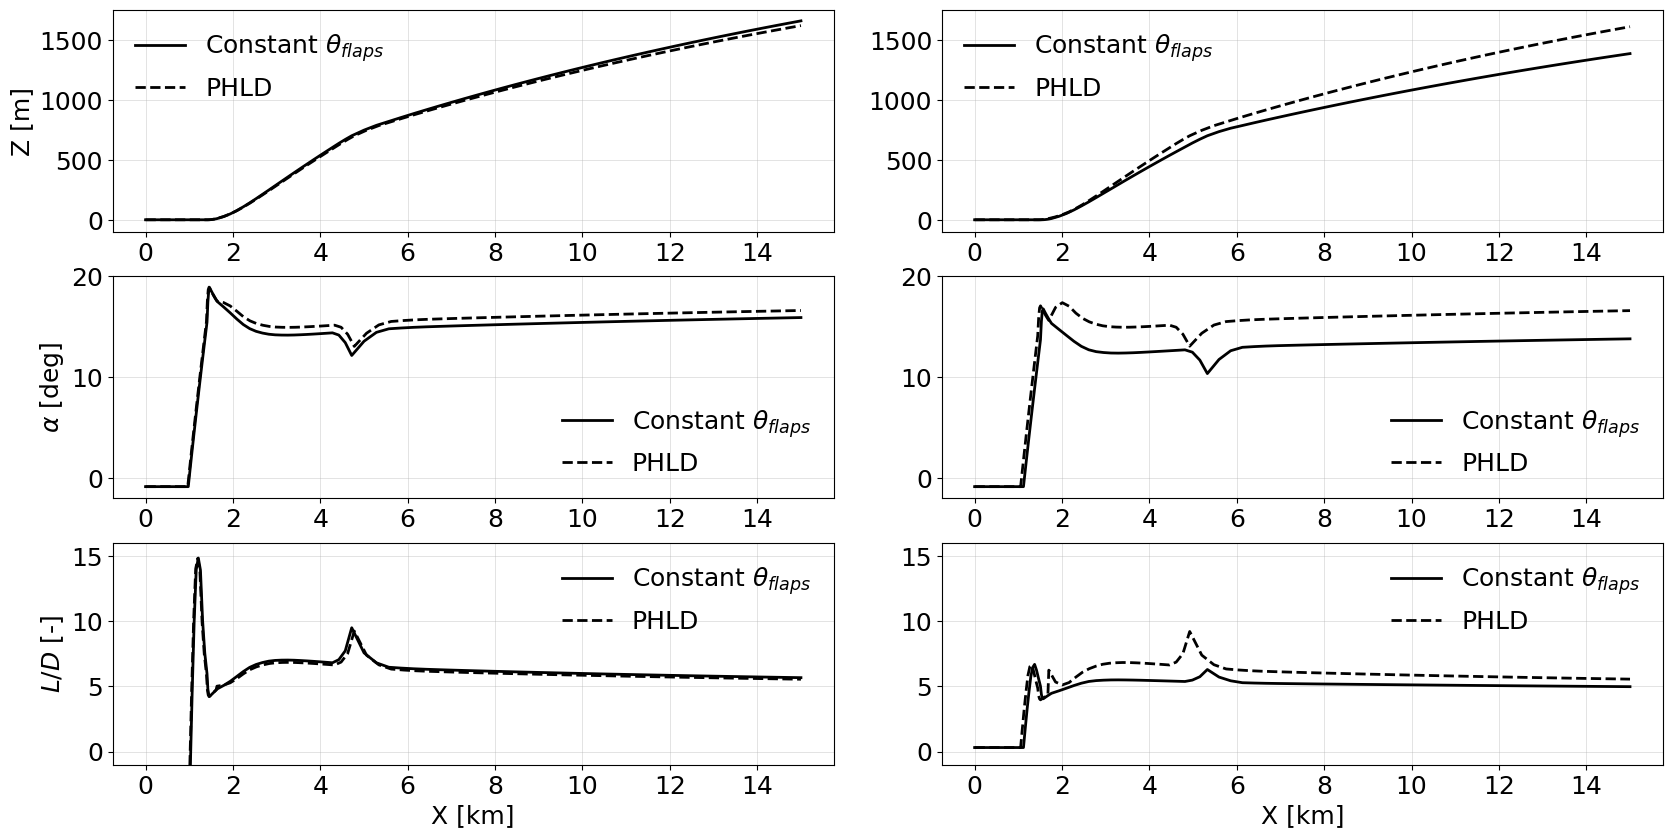

In [64]:
fig, ax = plt.subplots(3,2, figsize=(20,10))
plt.style.use('../utils/plot.mplstyle')

ac_name = 'stca'
case = 'V2'
kind = 'std'

py.case_name = 'stca'
py.output_directory_name = 'PHLD/V2'

if ac_name == 'stca' and case == 'V2' and kind == 'std':
    TS = 0.75
    z_cb = 700.0
elif ac_name == 'stca' and case == 'V2' and kind == 'adv':
    TS = 0.75
    z_cb = 25.0
elif ac_name == 'stca' and case == 'Vmax' and kind == 'std':
    TS = 0.4
    z_cb = 600.0
elif ac_name == 'stca' and case == 'Vmax' and kind == 'adv':
    TS = 0.55
    z_cb = 25.0

for i,theta in enumerate([6.0, 26.0]):

    path_save_name = py.ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '.sql'
    traj = py.load_results(path_save_name)

    path_save_name = ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '_constant_th.sql'
    traj_ct = py.load_results(path_save_name)

    ax[0,i].plot(traj_ct.get_val('trajectory.x')/1000, traj_ct.get_val('trajectory.z'), 'k', label=r'Constant $\theta_{flaps}$')
    ax[0,i].plot(traj.get_val('trajectory.x')/1000, traj.get_val('trajectory.z'), 'k--', label='PHLD')
    ax[0,i].legend(frameon=False)

    ax[1,i].plot(traj_ct.get_val('trajectory.x')/1000, traj_ct.get_val('trajectory.alpha'), 'k', label=r'Constant $\theta_{flaps}$')
    ax[1,i].plot(traj.get_val('trajectory.x')/1000, traj.get_val('trajectory.alpha'), 'k--', label='PHLD')
    ax[1,i].legend(frameon=False)

    ax[2,i].plot(traj_ct.get_val('trajectory.x')/1000, traj_ct.get_val('trajectory.c_l')/traj_ct.get_val('trajectory.c_d'), 'k', label=r'Constant $\theta_{flaps}$')
    ax[2,i].plot(traj.get_val('trajectory.x')/1000, traj.get_val('trajectory.c_l')/traj.get_val('trajectory.c_d'), 'k--', label='PHLD')
    ax[2,i].legend(frameon=False)

ax[2,0].set_xlabel('X [km]')
ax[2,1].set_xlabel('X [km]')

ax[0,0].set_ylabel('Z [m]')
ax[1,0].set_ylabel(r'$\alpha$ [deg]')
ax[2,0].set_ylabel(r'$L/D$ [-]')

ax[0,0].set_ylim([-100, 1750])
ax[0,1].set_ylim([-100, 1750])
ax[1,0].set_ylim([-2, 20])
ax[1,1].set_ylim([-2, 20])
ax[2,0].set_ylim([-1, 16])
ax[2,1].set_ylim([-1, 16])

plt.subplots_adjust(wspace=0.15)


In [66]:
# Create aerodynamics cubic interpolants 
A  = np.zeros(np.size(py.airframe.aero['alpha'])*np.size(py.airframe.aero['theta_flaps'])*np.size(py.airframe.aero['theta_slats']))
TF = np.zeros(np.size(py.airframe.aero['alpha'])*np.size(py.airframe.aero['theta_flaps'])*np.size(py.airframe.aero['theta_slats']))
TS = np.zeros(np.size(py.airframe.aero['alpha'])*np.size(py.airframe.aero['theta_flaps'])*np.size(py.airframe.aero['theta_slats']))
CL = np.zeros(np.size(py.airframe.aero['alpha'])*np.size(py.airframe.aero['theta_flaps'])*np.size(py.airframe.aero['theta_slats']))
CD = np.zeros(np.size(py.airframe.aero['alpha'])*np.size(py.airframe.aero['theta_flaps'])*np.size(py.airframe.aero['theta_slats']))

cntr = -1
for i, a in enumerate(py.airframe.aero['alpha']):
    for j, tf in enumerate(py.airframe.aero['theta_flaps']):
        for k, ts in enumerate(py.airframe.aero['theta_slats']):
            cntr = cntr + 1
            A[cntr] = a
            TF[cntr] = tf
            TS[cntr] = ts
            CL[cntr] = py.airframe.aero['c_l'][i,j,k]
            CD[cntr] = py.airframe.aero['c_d'][i,j,k]
            
f_LD = scipy.interpolate.Rbf(A, TF, TS, CL/CD, function='cubic')
f_D = scipy.interpolate.Rbf(A, TF, TS, CD, function='cubic')

f_alpha = scipy.interpolate.Rbf(TS, TF, CL, A, function='cubic')

AttributeError: 'pyna' object has no attribute 'airframe'

In [56]:
ac_name = 'stca'
case = 'V2'
kind = 'std'

if ac_name == 'stca' and case == 'V2' and kind == 'std':
    TS = 0.75
    z_cb = 700.0
elif ac_name == 'stca' and case == 'V2' and kind == 'adv':
    TS = 0.75
    z_cb = 25.0
elif ac_name == 'stca' and case == 'Vmax' and kind == 'std':
    TS = 0.4
    z_cb = 600.0
elif ac_name == 'stca' and case == 'Vmax' and kind == 'adv':
    TS = 0.55
    z_cb = 25.0

py.output_directory_name = 'PHLDz/' + case


No handles with labels found to put in legend.


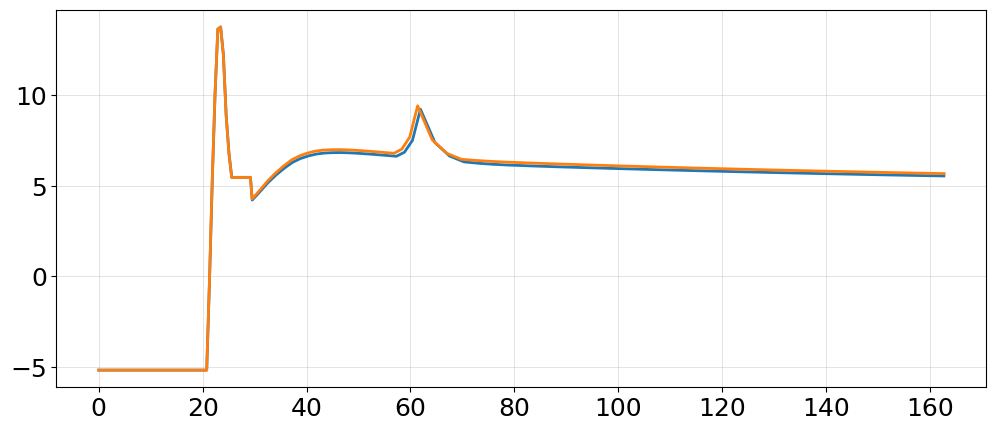

In [18]:
theta = 8.0
r = py.load_results(file_name=py.ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '.sql')
r_ct = py.load_results(file_name=py.ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '_constant_th.sql')

plt.plot(r.get_val('trajectory.t_s'), r.get_val('trajectory.c_l')/r.get_val('trajectory.c_d'))
plt.plot(r_ct.get_val('trajectory.t_s'), r_ct.get_val('trajectory.c_l')/r_ct.get_val('trajectory.c_d'))

# plt.plot(r.get_val('trajectory.x'), r.get_val('trajectory.alpha'), label='Flap retraction')
# plt.plot(r_ct.get_val('trajectory.x'), r_ct.get_val('trajectory.alpha'), label=r'Constant $\theta$')
plt.legend(frameon=False)

In [65]:
# Plot figure 
plt.figure(figsize=(15,5.5))
plt.style.use('../utils/plot.mplstyle')

alpha = np.linspace(-2, 25, 100)

for th_flaps in theta_lst:
    ld = f_LD(alpha, th_flaps*np.ones(np.size(alpha)), -6*np.ones(np.size(alpha)))
    plt.plot(alpha, ld, label=r'$\theta_{flaps}=$'+str(th_flaps)+' deg')
        
plt.ylim([0, 17.5])
plt.xlabel(r'$\alpha$ [deg]')
plt.ylabel(r'$L/D$ [-]')
plt.legend(frameon=False, loc='upper right')


NameError: name 'f_LD' is not defined

<Figure size 1500x550 with 0 Axes>

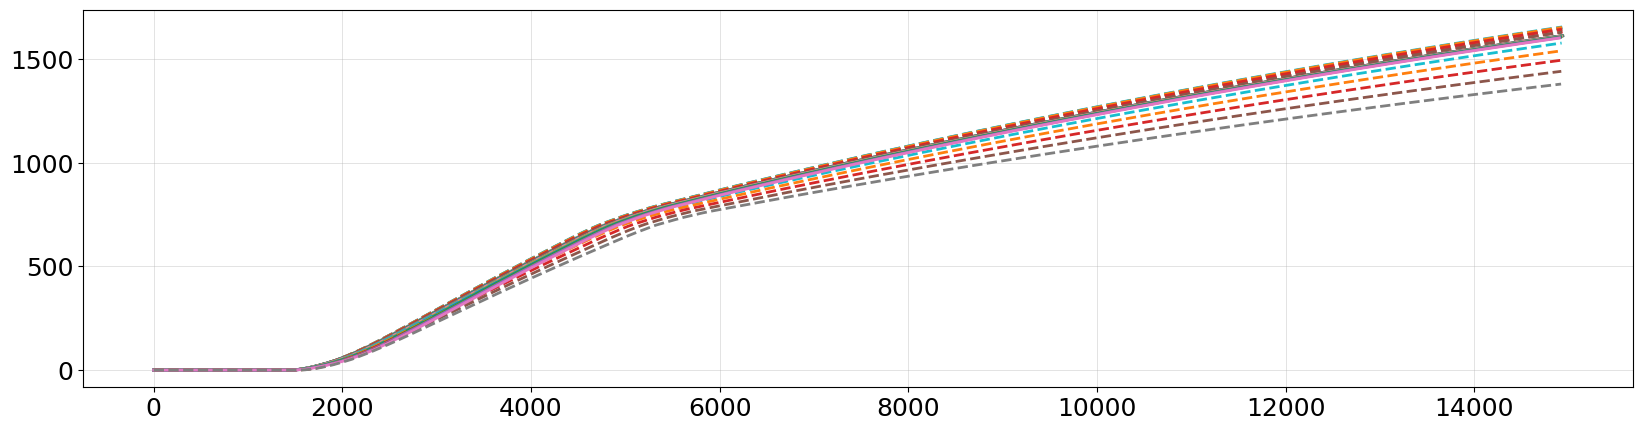

In [8]:
plt.figure(figsize=(20,5))
plt.style.use('../utils/plot.mplstyle')

ac_name = 'stca'
case = 'V2'
kind = 'std'

if ac_name == 'stca' and case == 'V2' and kind == 'std':
    TS = 0.75
    z_cb = 700.0
elif ac_name == 'stca' and case == 'V2' and kind == 'adv':
    TS = 0.75
    z_cb = 25.0
elif ac_name == 'stca' and case == 'Vmax' and kind == 'std':
    TS = 0.4
    z_cb = 600.0
elif ac_name == 'stca' and case == 'Vmax' and kind == 'adv':
    TS = 0.55
    z_cb = 25.0

theta_lst = np.linspace(0, 26, 14)

d_min = np.zeros(14)
d_min2 = np.zeros(14)
d_min_ct = np.zeros(14)
d_min_ct2 = np.zeros(14)

for i,theta in enumerate(theta_lst):
    
    path_save_name = 'trajectory_' + py.ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '.csv'
    traj = pd.read_csv('../cases/' + ac_name + '/trajectory/PHLDz/' + case + '/'  + path_save_name)
    
    path_save_name = 'trajectory_' + ac_name + '_' + str(np.round(z_cb,3)) + '_' + str(np.round(TS,3)) + '_' + str(np.round(theta,3)) + '_constant_th.csv'
    traj_constant_th = pd.read_csv('../cases/' + ac_name + '/trajectory/PHLDz/' + case + '/' + path_save_name)
        
    plt.plot(traj['X [m]'], traj['Z [m]'])
    plt.plot(traj_constant_th['X [m]'], traj_constant_th['Z [m]'], '--')
        
# Standard trajectory